<a href="https://colab.research.google.com/github/apal9569/Driver-Distraction/blob/master/driver_distraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd drive/My Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/final_project/state-farm-distracted-driver-detection


In [0]:
cd final_project/state-farm-distracted-driver-detection/

[Errno 2] No such file or directory: 'final_project/state-farm-distracted-driver-detection/'
/content/drive/My Drive/final_project/state-farm-distracted-driver-detection


In [0]:
cd ..

In [0]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
import os
import glob
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import h5py

In [0]:
no_of_class=10
images=[]
labels=[]
for i in tqdm(range(no_of_class)):
  files=glob.glob(os.path.join('imgs','train','c'+str(i),'*.jpg'))
  #with h5py.File('data.h5', 'w') as hf: 
  for file in files:
    
    img=cv2.imread(file)
    img=cv2.resize(img,(200,200))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    #cv2_imshow(img)    
    images.append(img)
    labels.append(i)

100%|██████████| 10/10 [1:19:05<00:00, 447.02s/it]


In [0]:
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [0]:
train_img,test_img,train_label,test_label=train_test_split(images,labels,train_size=0.9,test_size=0.1,shuffle=True, random_state=42)
train_label=to_categorical(train_label,10)
test_label=to_categorical(test_label,10)


In [0]:
t=pd.DataFrame(train_label)
t2=pd.DataFrame(test_label)
t.nunique(),t2.nunique()

#cv2_imshow(train_img[140]),cv2_imshow(test_img[180])
#train_label[140],test_label[180]

(0    10
 dtype: int64, 0    10
 dtype: int64)

In [0]:
del images

In [0]:
train_img = np.array(train_img,dtype=np.float32).reshape(-1,200,200,1)
test_img = np.array(test_img,dtype=np.float32).reshape(-1,200,200,1)
train_img.shape,test_img.shape

((20193, 200, 200, 1), (2244, 200, 200, 1))

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        zca_epsilon=1e-06,  
        rotation_range=0,  

        width_shift_range=0.1,
        
        height_shift_range=0.1,
        shear_range=0.,  
        zoom_range=0.,  
        channel_shift_range=0., 
        
        fill_mode='nearest',
        cval=0.,  
        horizontal_flip=True,  
        vertical_flip=False,  
        
        rescale=None,
        
        preprocessing_function=None,
        
        data_format=None,
        
        validation_split=0.0)

datagen.fit(train_img)

In [0]:
def create_model():
  model = Sequential()

  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  model.add(Dropout(0.3))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  model.add(Dropout(0.3))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  model.add(Dropout(0.3))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(1024,activation='relu'))    
  model.add(BatchNormalization())
  model.add(Dense(512,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(10,activation='softmax'))

  return model

In [0]:
model2 = create_model_v2()
#model2=load_model('gray_model_300/model_20_300.h5')

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#when we are not using generator
history = model2.fit(train_img, train_label, 
          validation_data=(test_img, test_label),
          epochs=20, batch_size=128
        , verbose=1)

Train on 20193 samples, validate on 2244 samples
Epoch 1/20
20193/20193 [==============================] - 65s 3ms/step - loss: 1.0877 - acc: 0.6710 - val_loss: 1.8419 - val_acc: 0.7224
Epoch 2/20
20193/20193 [==============================] - 56s 3ms/step - loss: 0.1932 - acc: 0.9414 - val_loss: 0.7096 - val_acc: 0.8917
Epoch 3/20
20193/20193 [==============================] - 56s 3ms/step - loss: 0.0995 - acc: 0.9702 - val_loss: 0.2182 - val_acc: 0.9563
Epoch 4/20
20193/20193 [==============================] - 56s 3ms/step - loss: 0.0623 - acc: 0.9818 - val_loss: 0.1826 - val_acc: 0.9661
Epoch 5/20
20193/20193 [==============================] - 56s 3ms/step - loss: 0.0525 - acc: 0.9858 - val_loss: 0.0532 - val_acc: 0.9889
Epoch 6/20
20193/20193 [==============================] - 56s 3ms/step - loss: 0.0465 - acc: 0.9876 - val_loss: 0.1206 - val_acc: 0.9759
Epoch 7/20
20193/20193 [==============================] - 56s 3ms/step - loss: 0.0371 - acc: 0.9900 - val_loss: 0.0526 - val_acc:

In [0]:
#while we are using generator
history=model2.fit_generator(datagen.flow(train_img, train_label,
                                     batch_size=64),
                        epochs=20,
                        validation_data=(test_img,test_label),
                        workers=4)

In [0]:
model2.save('gray_model_300/model_20_300.h5')

In [0]:
!mkdir gray_model_300

In [0]:
classtype={0:"safe driving",1:"texting-right",2:"talking on the phone right",3:"texting left",4:"talking on the phone left",
           5:"operating the radio",6:"drinking",7:"reaching behind",8:"hair and makeup",9:"talking to passenger"}

In [0]:
#Changing brightness and contrast of images
def image_setting(img):
#for img in tqdm(images):
  new_image=np.zeros(img.shape,img.dtype)
  alpha=0.8
  beta=-25
    
    
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      #for c in range(img.shape[2]):
      new_image[y,x] = np.clip(alpha*img[y,x] + beta, 0, 255)
  
  return new_image
  #ref_images.append(new_image)

In [0]:
#Degrading images
def add_gaussian_noise(X_imgs):
  gaussian_noise_imgs = []
  row, col = X_imgs.shape
    # Gaussian distribution parameters
  mean = 0
  var = 70
  sigma = var ** 0.5

  X_imgs=np.array(X_imgs).astype(np.float32)
  gaussian = np.random.normal(mean,sigma,(row, col, 1)).astype(np.float32)
  #gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
  
  gaussian_img = cv2.addWeighted(X_imgs,1,  gaussian, 0.4,0)
  
  return gaussian_img
  

In [0]:
cd realtime/

[Errno 2] No such file or directory: 'realtime/'
/content/drive/My Drive/final_project/state-farm-distracted-driver-detection/realtime


13


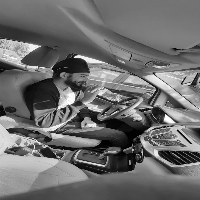


 The driver is drinking 
 



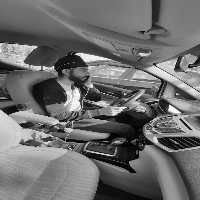


 The driver is operating the radio 
 



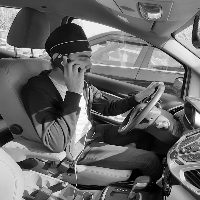


 The driver is talking on the phone right 
 



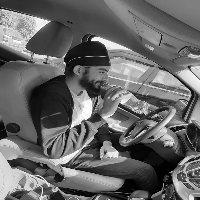


 The driver is drinking 
 



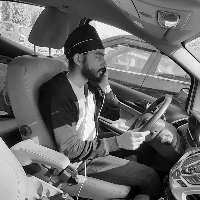


 The driver is talking on the phone left 
 



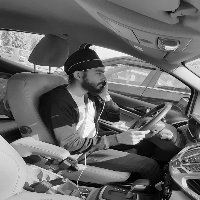


 The driver is talking on the phone left 
 



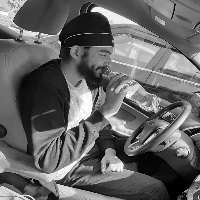


 The driver is drinking 
 



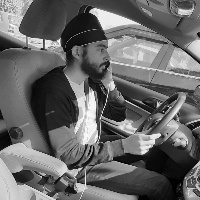


 The driver is talking on the phone left 
 



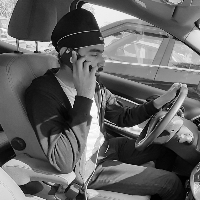


 The driver is talking on the phone right 
 



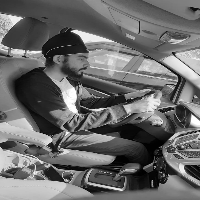


 The driver is safe driving 
 



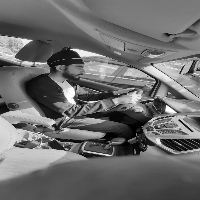


 The driver is operating the radio 
 



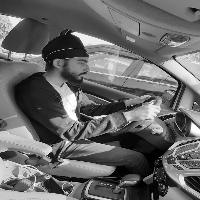


 The driver is safe driving 
 



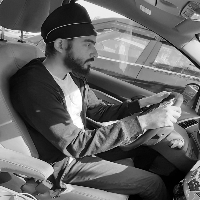


 The driver is safe driving 
 



In [0]:

files=glob.glob(os.path.join('realtime','*.jpeg'))
print(len(files))
for file in files:
  
  img=cv2.imread(file)
  img=cv2.flip(img,1)  
  
  img=cv2.resize(img,(200,200))
  
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
  img=image_setting(img) #for changing the brightness and contrast of images
  img=add_gaussian_noise(img) #for degrading images
  img= np.array(img, dtype=np.float32)
  
  cv2_imshow(img)
      
  img=np.reshape(img,(1,200,200,1))
  p=model2.predict(img)
  index=np.argmax(p)
  

  print("\n","The driver is "+classtype[index],"\n","\n")
''' FOR ADDING THE RESULTS IN PREDICTED IMAGES
  #font                   = cv2.FONT_HERSHEY_SIMPLEX
  #bottomLeftCornerOfText = (50,10)
  #fontScale              = 0.5
  #fontColor              = (0,0,255)
  #lineType               = 2
  #text=classtype[index]
  #cv2.putText(test_img[i],str(text), 
  #  bottomLeftCornerOfText, 
  #  font, 
  #  fontScale,
  #  fontColor,
  #  lineType)

#Display the image
  #cv2_imshow(test_img[i])

#Save image
  cv2.imwrite(str(file)+"1.jpg", img)

  #cv2.imwrite(str(i)+'.jpg', test_img[i])

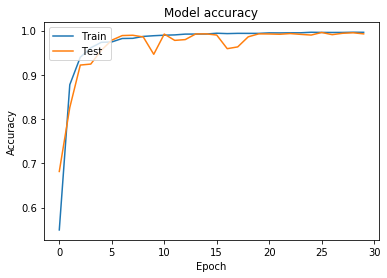

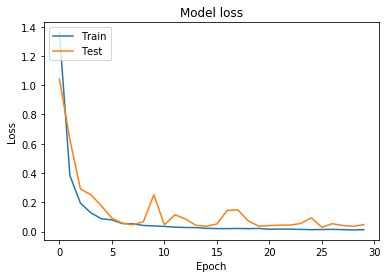

In [0]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#plt.savefig('accuracy.png')
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#plt.savefig('loss.png')